In [3]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#Potential models - first need to preprocess data and visualize it
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [29]:
#attribute information at: https://archive.ics.uci.edu/ml/datasets/Early+stage+diabetes+risk+prediction+dataset.
dataset = pd.read_csv(r'C:/Users/danah/DiabetesProject/diabetes_data_upload.csv')

print(dataset.shape)

print(dataset.describe(include='all'))

print(dataset.head(25))

(520, 17)
               Age Gender Polyuria Polydipsia sudden weight loss weakness  \
count   520.000000    520      520        520                520      520   
unique         NaN      2        2          2                  2        2   
top            NaN   Male       No         No                 No      Yes   
freq           NaN    328      262        287                303      305   
mean     48.028846    NaN      NaN        NaN                NaN      NaN   
std      12.151466    NaN      NaN        NaN                NaN      NaN   
min      16.000000    NaN      NaN        NaN                NaN      NaN   
25%      39.000000    NaN      NaN        NaN                NaN      NaN   
50%      47.500000    NaN      NaN        NaN                NaN      NaN   
75%      57.000000    NaN      NaN        NaN                NaN      NaN   
max      90.000000    NaN      NaN        NaN                NaN      NaN   

       Polyphagia Genital thrush visual blurring Itching Irritabi

In [32]:
print(dataset.groupby('Gender').size())
print(dataset.groupby('class').size())

Gender
Female    192
Male      328
dtype: int64
class
Negative    200
Positive    320
dtype: int64


In [20]:
dataset.isna().values.any() #check for missing values - does not align with what the paper says?

False

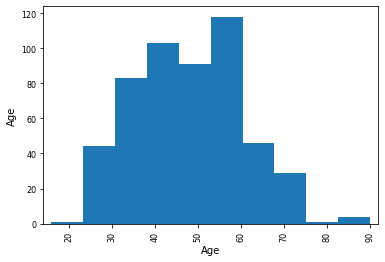

In [35]:
dataset.replace(('Yes','No'),(1,0), inplace=True)
dataset.replace(('Male','Female'),(1,0), inplace=True)
dataset.replace(('Positive', 'Negative'),(1,0), inplace=True)

TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

In [36]:
dataset

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


In [42]:
ages_df = pd.DataFrame({'Age':dataset['Age']})
ages_df

,Age
0,40
1,58
2,41
3,45
4,60
...,...
515,39
516,48
517,58
518,32


In [48]:
ages_df['age'] = pd.cut(x=ages_df['Age'], bins=[20, 30, 40, 50, 60, 70], labels=[1,2,3,4,5])
ages_df

,Age,age_bins,age
0,40,2,2
1,58,4,4
2,41,3,3
3,45,3,3
4,60,4,4
...,...,...,...
515,39,2,2
516,48,3,3
517,58,4,4
518,32,2,2


In [49]:
dataset['Age'] = ages_df['age']
dataset

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,2,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,4,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,3,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,3,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,4,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,2,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,3,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,4,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,2,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0
